$$ f(x,y) = x^2y$$

$$F = (2xy, -x^2)$$

$$\nabla F =
\left(\begin{array}
22y & 2x\\
-2x & 0
\end{array}\right)
$$

$$y+\sqrt{y^2-4x^2}$$

In [1]:
import numpy as np

In [2]:
import matplotlib.pyplot as plt

In [3]:
def oracle_1(x,y):
    gx = 2*x*y
    gy = -x**2
    F = [gx,gy]
    return(F)

def oracle_2(x,y):
    gxx = 2*y
    gxy = 2*x
    gyy = 0
    nabla_F = np.zeros((2,2))
    nabla_F[0][0] = gxx
    nabla_F[0][1] = gxy
    nabla_F[1][0] = -gxy
    nabla_F[1][1] = -gyy

    return(nabla_F)

Weak MVI : 

$$\langle F(u),u-u^*\rangle\geq -\frac{\rho}{2}\|F(u)\|^2_{p^*}$$

In [4]:
from numpy.linalg import eig

In [5]:
def region() -> None:
    
    x, y = np.mgrid[-1:1:1000j, -1:1:1000j]
    i = np.where(np.abs(y)<=2*np.abs(x))
    
    # Calculate the max eigenvalue in the domain [-2,2]^2
    max_eigen = y+np.sqrt(y**2-4*x**2)
    max_eigen[i] = np.sqrt(y[i]**2+np.abs(y[i]**2-4*x[i]**2))
    
    #Obtain the Lipschitz constant
    L = np.max(max_eigen)
    
    # Calculate the LHS of Weak-MVI
    z = x**2*y+1/(8*L)*(4*x**2*y**2+x**4)
    
    return((x,y,z))

In [6]:
region()[2].shape

F:\Anaconda\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in sqrt
  import sys


(1000, 1000)

F:\Anaconda\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in sqrt
  import sys


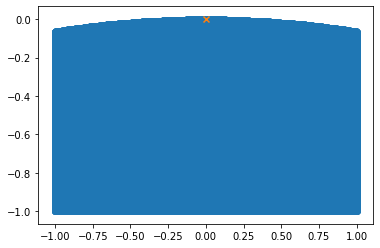

In [7]:
# obtain the region where MVI is not satisfied
r = np.where(region()[2]<0)
# plot the region
plt.scatter(region()[0][r[0],r[1]],region()[1][r[0],r[1]])
plt.scatter(0,0,marker = 'x')


$$ f(x,y) = x^2y+xy$$

$$F = (2xy+y,x^2+x)$$

$$\nabla F =
\left(\begin{array}
22y & 2x+1\\
-2x-1 & 0
\end{array}\right)
$$

In [8]:
def region() -> None:
    
    x, y = np.mgrid[-1:1:1000j, -1:1:1000j]
    i = np.where(np.abs(y)<=(2*np.abs(x)+1))
    #calculate the Lipschitz constant of F
    z = y+np.sqrt(y**2-(2*x+1)**2)
    z[i] = np.sqrt(y[i]**2+np.abs(y[i]**2-(2*x[i]+1)**2))
    # Calculate the LHS of Weak-MVI
    z = x**2*y+1/(8*np.max(z))*((2*x*y+y)**2+(x**2+x)**2)
    
    return((x,y,z))

In [9]:
def region() -> None:
    
    x, y = np.mgrid[-1:1:1000j, -1:1:1000j]
    i = np.where(np.abs(y)<=(2*np.abs(x)+1))
    
    # Calculate the max eigenvalue in the domain [-2,2]^2
    max_eigen = y+np.sqrt(y**2-(2*x+1)**2)
    max_eigen[i] = np.sqrt(y[i]**2+np.abs(y[i]**2-(2*x[i]+1)**2))
    
    #Obtain the Lipschitz constant
    L = np.max(max_eigen)
    
    # Calculate the LHS of Weak-MVI
    z = x**2*y+1/(8*L)*((2*x*y+y)**2+(x**2+x)**2)
    
    return((x,y,z))

F:\Anaconda\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in sqrt
  import sys


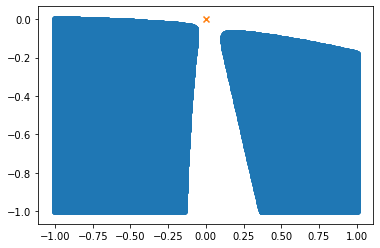

In [10]:
# obtain the region where MVI is not satisfied
r = np.where(region()[2]<0)
# plot the region
plt.scatter(region()[0][r[0],r[1]],region()[1][r[0],r[1]])
plt.scatter(0,0,marker = 'x')
